In [11]:
# Model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

# Plot
import matplotlib.pyplot as plt

# Datas
from sklearn.model_selection import train_test_split
from google.colab import drive
import pandas as pd 
import numpy as np


# Prepare

In [12]:
# Data
drive.mount('/content/gdrive')
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/learning-data-science-main/machine-learning/datas/Hitters.csv")
df = df.dropna()

# Dummie
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1)
X = pd.concat([X, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)

# Test Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Model

In [13]:
gbm_model = GradientBoostingRegressor(random_state = 42).fit(X_train, y_train)

# Predict

In [14]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

355.2571883779714

# Model Tuning

In [15]:
gbm_params = {"learning_rate": [0.001, 0.01, 0.1, 0.2],
             "max_depth": [3,5,8,50,100],
             "n_estimators": [100, 200, 500],
             "subsample": [1,0.5,0.75]}

gmb_model = GradientBoostingRegressor(random_state=42)
gbm_cv_model = GridSearchCV(gmb_model, gbm_params, cv=5, n_jobs = -1).fit(X_train, y_train)

### Tuned Model

In [23]:
params=pd.Series(gbm_cv_model.best_params_)
gbm_tuned = GradientBoostingRegressor(random_state=42, learning_rate=params[0], max_depth=params[1], n_estimators=int(params[2]), subsample=params[3]).fit(X_train, y_train)
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

330.00159519295244

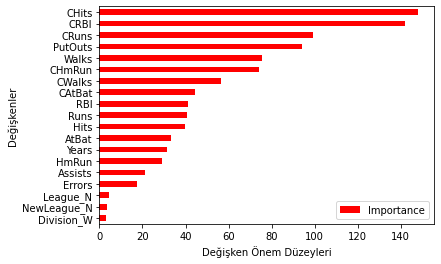

In [24]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*1000},
                         index = X_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri");
plt.ylabel("Değişkenler");